State Preparation

The notebook presents the state preparation approach using the classiq synthesis engine. Currently, for presenting our approach we will use an example system consisting of 4 masses.

The are connected by various springs. The first mass is connected to wall, followed by the second mass being connected to first, third mass to second and fourth mass to third

In [1]:
#installation of classiq
!pip install -U classiq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.6/388.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Foun

We have a N=4 number of masses and so n = 2 (since N = 2^n).

The values of masses are as follows -
m1 = 1, m2 = 1, m3 = 1, m4 = 1

The values of spring constants are given by (Kij represents the spring constant of spring between masses i and j).

K11 = 1, K12 = 1, K21 = 1, K23 = 1,
K32 = 1, K34 = 1, K43 = 1


Additionally, the initial position is assumed as 0 for all the masses and the corresponding velocities are v1 = 1, v2 = -1, v3 = 0, v4 = 0

In [1]:
import numpy as np

N = 4
n = np.log2(N)
m = 1

# mass matrix
M = np.diag(np.full(N,m))
print("Mass matrix")
print(M)

#position vector
x = np.zeros(N)
print("Position matrix")
print(x)

#velocity vector
x_dot = np.array([1,-1,0,0])
print("Velocity matrix")
print(x_dot)

#spring constant matrix
K = np.array(([1,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]))
print("Spring constant matrix")
print(K)

Mass matrix
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Position matrix
[0. 0. 0. 0.]
Velocity matrix
[ 1 -1  0  0]
Spring constant matrix
[[1 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]


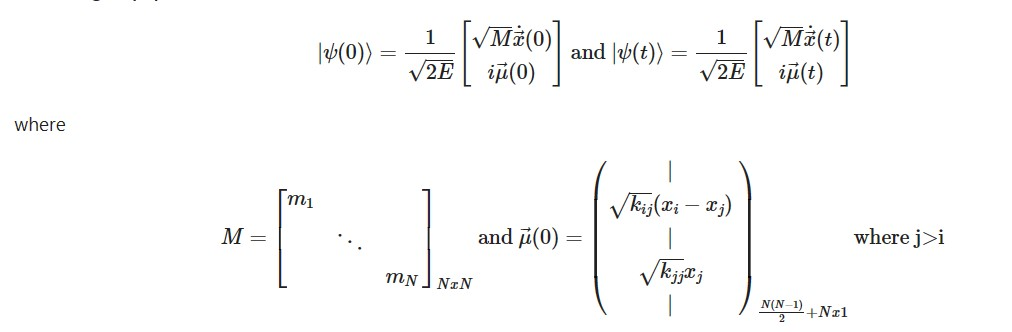

In [2]:
from PIL import Image

img = Image.open('/content/Screenshot 2024-04-11 201546.jpg')
display(img)

In [3]:
#y_dot vector
y_dot = np.matmul(np.transpose(x_dot),np.sqrt(M))
print("y_dot vector")
print(y_dot)

y_dot vector
[ 1. -1.  0.  0.]


In [4]:
#mu vector
mu = []
for i in range(len(K)):
    for j in range(len(K[0])):
        if j>i:
            mu.append(np.sqrt(K[i][j])*(x[i]-x[j]))
        elif j==i:
            mu.append(np.sqrt(K[j][j])*x[j])
if len(mu)==(N*(N+1)/2):
    print("mu vector is formed correctly")
print("M = ",M)
print("x_dot = ",x_dot,"y_dot = ",y_dot, "mu = ", mu)

mu vector is formed correctly
M =  [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
x_dot =  [ 1 -1  0  0] y_dot =  [ 1. -1.  0.  0.] mu =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [5]:
#Initial State
psi0 = []
E = 1
psi0 = np.concatenate([y_dot,i*np.array(mu)])/np.sqrt(2*E)
print("psi0 = ",psi0, "size_of_psi0 = ",len(psi0))

psi0 =  [ 0.70710678 -0.70710678  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] size_of_psi0 =  14


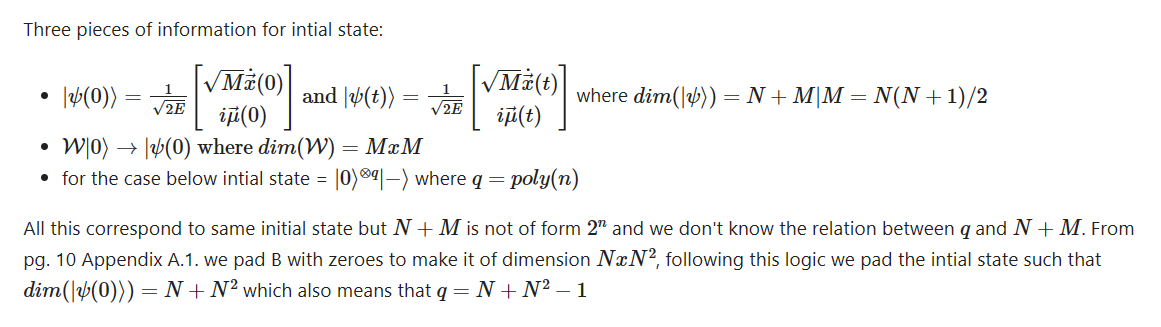

In [6]:
img = Image.open('/content/Screenshot 2024-04-11 205033.png')
display(img)

In [7]:
#making dimesion of q suitable with padding zeros
dim = int(N+(N*(N+1)/2))
while not(dim and (not(dim & (dim - 1)))): #checking of it is a power of 2
    dim+=1

num_qubits = int(np.log2(dim))
print(num_qubits)

4


In [8]:
from classiq import (
    Output,
    QArray,
    QBit,
    control,
    create_model,
    execute,
    prepare_state,
    qfunc,
    show,
    synthesize,
)

In [9]:
values_required = 2**num_qubits
for i in range(values_required - len(psi0)):
  psi0 = np.append(psi0,0.)

print(psi0)
print(len(psi0))

[ 0.70710678 -0.70710678  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
16


In [10]:
print(type(psi0.tolist()))

<class 'list'>


In [11]:
psi0**2

array([0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. ])

In [12]:
@qfunc
def main(io: Output[QArray[QBit]]):
    prepare_state(probabilities=(psi0**2).tolist(), bound=0.01, out=io)


model = create_model(main)

In [13]:
# Dumping the model
from classiq import write_qmod

write_qmod(model, "prepare_state")

Synthesizing the model to get the quantum circuit.

In [14]:
import classiq

classiq.authenticate(overwrite=True)

Your user code: XZFQ-PTBH
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=XZFQ-PTBH


In [15]:
qprog = synthesize(model)
show(qprog)

Opening: https://platform.classiq.io/circuit/4a940fd8-d8d2-4836-97fd-9aab7bafc7f0?version=0.39.0


In [78]:
#Execution
from classiq.execution import (
    ClassiqBackendPreferences,
    ExecutionPreferences,
    set_quantum_program_execution_preferences,
)

preferences = ExecutionPreferences(
    backend_preferences=ClassiqBackendPreferences(backend_name="aer_simulator_statevector")
)
qprog = set_quantum_program_execution_preferences(qprog, preferences)

In [79]:
job = execute(qprog)
results = job.result()

In [80]:
print(results)

[TaggedExecutionDetails(value_type=<SavedResultValueType.ExecutionDetails: 'ExecutionDetails'>, name='result', value=ExecutionDetails(vendor_format_result={'backend_name': 'aer_simulator_statevector', 'backend_version': '0.11.2', 'date': '2024-04-12T22:39:32.718747', 'header': {'backend_name': 'aer_simulator_statevector', 'backend_version': '0.11.2'}, 'qobj_id': '6fe89dbb-7822-429e-803f-0d9461fd8618', 'job_id': 'b650f351-e2d8-4ad5-a276-0b714084a53d', 'status': 'COMPLETED', 'success': True, 'results': [{'shots': 2048, 'success': True, 'data': {'counts': {'0xf': 1, '0x8': 1, '0xe': 3, '0x2': 157, '0x0': 1, '0x14': 1171, '0x12': 3, '0x17': 166, '0x15': 158, '0x3': 5, '0x1b': 2, '0x10': 275, '0x4': 26, '0x5': 1, '0x11': 29, '0x18': 7, '0x16': 33, '0xa': 1, '0x19': 8}, 'statevector': None}, 'meas_level': 2, 'header': {'clbit_labels': [['c32', 0], ['c32', 1], ['c32', 2], ['c32', 3], ['c32', 4]], 'creg_sizes': [['c32', 5]], 'global_phase': 0.0, 'memory_slots': 5, 'metadata': {}, 'n_qubits': 5

In [74]:
parsed_counts = results[0].value.parsed_counts
print(parsed_counts)

[{'io': 20.0}: 1164, {'io': 16.0}: 281, {'io': 23.0}: 164, {'io': 2.0}: 155, {'io': 21.0}: 148, {'io': 17.0}: 41, {'io': 22.0}: 38, {'io': 4.0}: 27, {'io': 25.0}: 8, {'io': 14.0}: 6, {'io': 24.0}: 4, {'io': 18.0}: 4, {'io': 3.0}: 3, {'io': 27.0}: 2, {'io': 0.0}: 1, {'io': 15.0}: 1, {'io': 5.0}: 1]


In [81]:
state_vector = results[0].value.state_vector
print(state_vector)

{'00000': '(-0.0011109027062402022-0.02477983509425856j)', '00001': '(0.37807573221842355-0.016949481402406874j)', '00010': '(0.00040437615206768626+0.009020028763987706j)', '00011': '(0.04947216735542534-0.002217882580316347j)', '00100': '(0.0048365873208088776+0.10788508800588953j)', '00101': '(0.7443484596551546-0.03336982328859486j)', '00110': '(0.0002417847825911361+0.0053932599202958405j)', '00111': '(0.002790613062648944-0.00012510573987096j)', '01000': '(0.012669101047841722+0.28259741649277403j)', '01001': '(-0.04947799877898769+0.0022181440083764298j)', '01010': '(0.0006303216846883161+0.014059977813711554j)', '01011': '(-0.027976497294773757+0.0012542120009127933j)', '01100': '(-1.8358576116622727e-05-0.00040950704878678617j)', '01101': '(-0.1410949410490453+0.0063254154538106636j)', '01110': '(0.0017092023511719075+0.03812552815550488j)', '01111': '(-0.0012225380610573521+5.480750115314202e-05j)', '10000': '(0.00024446232915807664+0.005452985368875705j)', '10001': '(0.12388

In [21]:
job.open_in_ide()

Hamiltonian formulation

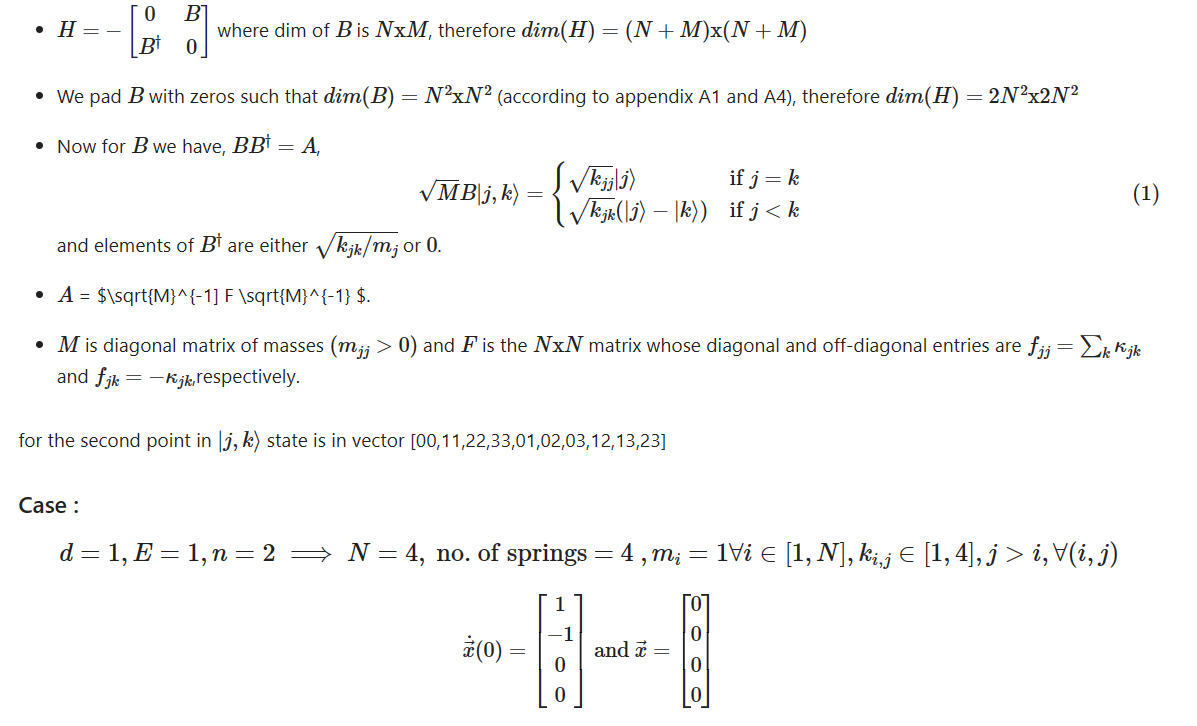

In [22]:
img = Image.open('/content/Screenshot 2024-04-11 234806.png')
display(img)

In [82]:
class Hamiltonian_Formulation:
    def __init__(self, n, K_matrix, M):
        self.N = 2**n
        self.K_matrix = K_matrix
        self.M = M

    def compute_F_matrix(self):
        N = self.N
        K = self.K_matrix
        # Matrix F
        F = np.zeros((N,N))
        for j in range(N):
            for k in range(N):
                if j==k:
                    F[j][k] = sum(K[j])
                else:
                    F[j][k] = -K[j][k]
        self.F_matrix = F

    def compute_B_matrix(self):
        N = self.N
        K = self.K_matrix
        sqM_B = np.zeros((N,int(N*(N+1)/2)))
        count = 0 #this will keep track of the coloumn of B based on |j,k>
        for j in range(N):
            for k in range(N):
                if j==k:
                    sqM_B[j][k] = np.sqrt(K[j][j])
                elif j<k:
                    sqM_B[j][N+count] = np.sqrt(K[j][k])
                    sqM_B[k][N+count] = -np.sqrt(K[j][k])
                    count+=1
        sqM_inv = np.linalg.inv(np.sqrt(M))
        #B matrix
        B = np.matmul(sqM_inv,sqM_B)
        #B dagger matrix
        B_dag = np.matrix(B).getH()
        self.B_matrix = B
        self.B_dag_matrix = B_dag

    def compute_Hamiltonian(self):
        #calling compute_B_matrix
        self.compute_B_matrix()
        ## doing the padding
        B = self.B_matrix
        B_dag = self.B_dag_matrix

        pad_B = np.pad(B,((0,int(N**2-N)),(0,int(N**2-(N*(N+1)/2)))),"constant")
        pad_B_dag = np.matrix(pad_B).getH()
        temp1 = np.concatenate((0*np.identity(N**2),-pad_B),axis = 1)
        temp2 = np.concatenate((-pad_B_dag, 0*np.identity(N**2)),axis = 1)
        # getting the hamiltonian
        H = np.concatenate((temp1,temp2),axis = 0)
        self.H_matrix = H

In [83]:
import copy
ham_formulation = Hamiltonian_Formulation(int(n), K, M)
ham_formulation.compute_Hamiltonian()
H_matrix = ham_formulation.H_matrix
print(H_matrix)
print(len(H_matrix))

[[ 0.  0.  0. ... -0. -0. -0.]
 [ 0.  0.  0. ... -0. -0. -0.]
 [ 0.  0.  0. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]]
32


In [84]:
H_list = np.array(H_matrix.tolist())
print(H_list)

[[ 0.  0.  0. ... -0. -0. -0.]
 [ 0.  0.  0. ... -0. -0. -0.]
 [ 0.  0.  0. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]]


Hamiltonian Evolution - Suzuki Trotterization

In [26]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 14.7 MB/s eta 0:00:00


In [101]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 22.4 MB/s eta 0:00:00


In [85]:
from qiskit.quantum_info import SparsePauliOp
H_ops = SparsePauliOp.from_operator(H_list)
print(H_ops)

SparsePauliOp(['XIIII', 'XIIIZ', 'XIIZI', 'XIIZZ', 'XIXII', 'XIXIX', 'XIXIZ', 'XIXXI', 'XIXXZ', 'XIXZI', 'XIXZZ', 'XIYYI', 'XIYYZ', 'XIYZY', 'XIZII', 'XIZIZ', 'XIZZI', 'XIZZZ', 'XXIXI', 'XXIXX', 'XXIXZ', 'XXIYY', 'XXZXI', 'XXZXX', 'XXZXZ', 'XXZYY', 'XYIXY', 'XYIYI', 'XYIYX', 'XYIYZ', 'XYZXY', 'XYZYI', 'XYZYX', 'XYZYZ', 'XZIII', 'XZIIZ', 'XZIZI', 'XZIZZ', 'XZXII', 'XZXIX', 'XZXIZ', 'XZXXI', 'XZXXZ', 'XZXZI', 'XZXZZ', 'XZYYI', 'XZYYZ', 'XZYZY', 'XZZII', 'XZZIZ', 'XZZZI', 'XZZZZ', 'YIXYI', 'YIXYZ', 'YIXZY', 'YIYII', 'YIYIX', 'YIYIZ', 'YIYXI', 'YIYXZ', 'YIYZI', 'YIYZZ', 'YXIXY', 'YXIYI', 'YXIYX', 'YXIYZ', 'YXZXY', 'YXZYI', 'YXZYX', 'YXZYZ', 'YYIXI', 'YYIXX', 'YYIXZ', 'YYIYY', 'YYZXI', 'YYZXX', 'YYZXZ', 'YYZYY', 'YZXYI', 'YZXYZ', 'YZXZY', 'YZYII', 'YZYIX', 'YZYIZ', 'YZYXI', 'YZYXZ', 'YZYZI', 'YZYZZ'],
              coeffs=[-0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j,
  0.125 +0.j, -0.0625+0.j, -0.0625+0.j,  0.0625+0.j, -0.0625+0.j,
 -0.0625+0.j,  0.0625-0.j, -0.0625+0.j,

In [86]:
H_ops_list = H_ops.to_list()
print(H_ops_list)

[('XIIII', (-0.0625+0j)), ('XIIIZ', (-0.0625+0j)), ('XIIZI', (-0.0625+0j)), ('XIIZZ', (-0.0625+0j)), ('XIXII', (-0.0625+0j)), ('XIXIX', (0.125+0j)), ('XIXIZ', (-0.0625+0j)), ('XIXXI', (-0.0625+0j)), ('XIXXZ', (0.0625+0j)), ('XIXZI', (-0.0625+0j)), ('XIXZZ', (-0.0625+0j)), ('XIYYI', (0.0625-0j)), ('XIYYZ', (-0.0625+0j)), ('XIYZY', (0.125-0j)), ('XIZII', (-0.0625+0j)), ('XIZIZ', (-0.0625+0j)), ('XIZZI', (-0.0625+0j)), ('XIZZZ', (-0.0625+0j)), ('XXIXI', (0.0625+0j)), ('XXIXX', (-0.0625+0j)), ('XXIXZ', (-0.0625+0j)), ('XXIYY', (-0.0625+0j)), ('XXZXI', (0.0625+0j)), ('XXZXX', (-0.0625+0j)), ('XXZXZ', (-0.0625+0j)), ('XXZYY', (-0.0625+0j)), ('XYIXY', (0.0625-0j)), ('XYIYI', (0.0625-0j)), ('XYIYX', (-0.0625+0j)), ('XYIYZ', (-0.0625+0j)), ('XYZXY', (0.0625-0j)), ('XYZYI', (0.0625-0j)), ('XYZYX', (-0.0625+0j)), ('XYZYZ', (-0.0625+0j)), ('XZIII', (-0.0625+0j)), ('XZIIZ', (-0.0625+0j)), ('XZIZI', (-0.0625+0j)), ('XZIZZ', (-0.0625+0j)), ('XZXII', (-0.0625+0j)), ('XZXIX', (0.125+0j)), ('XZXIZ', (-0

In [87]:
type(np.real(H_ops_list[0][1]))


float

In [88]:
H_ops_structured = []
for i in range(len(H_ops_list)):
    H_ops_structured.append((str(H_ops_list[i][0]),np.real(H_ops_list[i][1])))
print(H_ops_structured)

[('XIIII', -0.0625), ('XIIIZ', -0.0625), ('XIIZI', -0.0625), ('XIIZZ', -0.0625), ('XIXII', -0.0625), ('XIXIX', 0.125), ('XIXIZ', -0.0625), ('XIXXI', -0.0625), ('XIXXZ', 0.0625), ('XIXZI', -0.0625), ('XIXZZ', -0.0625), ('XIYYI', 0.0625), ('XIYYZ', -0.0625), ('XIYZY', 0.125), ('XIZII', -0.0625), ('XIZIZ', -0.0625), ('XIZZI', -0.0625), ('XIZZZ', -0.0625), ('XXIXI', 0.0625), ('XXIXX', -0.0625), ('XXIXZ', -0.0625), ('XXIYY', -0.0625), ('XXZXI', 0.0625), ('XXZXX', -0.0625), ('XXZXZ', -0.0625), ('XXZYY', -0.0625), ('XYIXY', 0.0625), ('XYIYI', 0.0625), ('XYIYX', -0.0625), ('XYIYZ', -0.0625), ('XYZXY', 0.0625), ('XYZYI', 0.0625), ('XYZYX', -0.0625), ('XYZYZ', -0.0625), ('XZIII', -0.0625), ('XZIIZ', -0.0625), ('XZIZI', -0.0625), ('XZIZZ', -0.0625), ('XZXII', -0.0625), ('XZXIX', 0.125), ('XZXIZ', -0.0625), ('XZXXI', -0.0625), ('XZXXZ', 0.0625), ('XZXZI', -0.0625), ('XZXZZ', -0.0625), ('XZYYI', 0.0625), ('XZYYZ', -0.0625), ('XZYZY', 0.125), ('XZZII', -0.0625), ('XZZIZ', -0.0625), ('XZZZI', -0.0625

In [89]:
from classiq import (PauliTerm,Pauli)
H_ops_restructured = []
for i in range(len(H_ops_structured)):
  str_value = H_ops_structured[i][0]
  pauli_val = []
  for x in range(len(str_value)):
    if str_value[x] == 'X':
      pauli_val.append(Pauli.X)
    elif str_value[x] == 'Y':
      pauli_val.append(Pauli.Y)
    elif str_value[x] == 'Z':
      pauli_val.append(Pauli.Z)
    elif str_value[x] == 'I':
      pauli_val.append(Pauli.I)
  H_ops_restructured.append(PauliTerm(pauli=pauli_val,coefficient=H_ops_structured[i][1]))
print(H_ops_restructured)

[struct_literal(PauliTerm, pauli=[Pauli.X, Pauli.I, Pauli.I, Pauli.I, Pauli.I], coefficient=-0.0625), struct_literal(PauliTerm, pauli=[Pauli.X, Pauli.I, Pauli.I, Pauli.I, Pauli.Z], coefficient=-0.0625), struct_literal(PauliTerm, pauli=[Pauli.X, Pauli.I, Pauli.I, Pauli.Z, Pauli.I], coefficient=-0.0625), struct_literal(PauliTerm, pauli=[Pauli.X, Pauli.I, Pauli.I, Pauli.Z, Pauli.Z], coefficient=-0.0625), struct_literal(PauliTerm, pauli=[Pauli.X, Pauli.I, Pauli.X, Pauli.I, Pauli.I], coefficient=-0.0625), struct_literal(PauliTerm, pauli=[Pauli.X, Pauli.I, Pauli.X, Pauli.I, Pauli.X], coefficient=0.125), struct_literal(PauliTerm, pauli=[Pauli.X, Pauli.I, Pauli.X, Pauli.I, Pauli.Z], coefficient=-0.0625), struct_literal(PauliTerm, pauli=[Pauli.X, Pauli.I, Pauli.X, Pauli.X, Pauli.I], coefficient=-0.0625), struct_literal(PauliTerm, pauli=[Pauli.X, Pauli.I, Pauli.X, Pauli.X, Pauli.Z], coefficient=0.0625), struct_literal(PauliTerm, pauli=[Pauli.X, Pauli.I, Pauli.X, Pauli.Z, Pauli.I], coefficient=-0

In [218]:
final_time = 1

In [219]:
from classiq import (
    CustomHardwareSettings,
    Preferences,
    QArray,
    QuantumProgram,
    allocate,
    create_model,
    qfunc,
    set_preferences,
    show,
    suzuki_trotter,
    synthesize,
    write_qmod,
    Z,
    PauliTerm,
    Pauli
)


@qfunc
def main(io: Output[QArray[QBit]]) -> None:
    psi_squared = psi0**2
    total_shape = int(len(H_list))
    for i in range(total_shape - len(psi_squared)):
      psi_squared = np.append(psi_squared,0.)
    state = prepare_state(probabilities=(psi_squared).tolist(), bound=0.01, out=io)
    Z(io[0]) # As classiq does not support phase
    # allocate(len(H_ops_restructured[0].pauli), io)
    suzuki_trotter(
        H_ops_restructured,
        qbv=io,
        evolution_coefficient=final_time,
        order=6,
        repetitions=1,
    )


qmod = create_model(main)
qmod = set_preferences(
    qmod,
    preferences=Preferences(
        custom_hardware_settings=CustomHardwareSettings(basis_gates=["cx", "u"])
    ),
)
write_qmod(qmod, "suzuki_trotter")

qprog = synthesize(qmod)
circuit = QuantumProgram.from_qprog(qprog)

print(f"Classiq's exponentiation depth is {circuit.transpiled_circuit.depth}")
print(
    f"Classiq's exponentiation CX-count is {circuit.transpiled_circuit.count_ops['cx']}"
)
show(qprog)

Classiq's exponentiation depth is 21202
Classiq's exponentiation CX-count is 16016
Opening: https://platform.classiq.io/circuit/a1b54c77-17e3-4367-875c-d378514663f8?version=0.39.0


In [220]:
preferences = ExecutionPreferences(
    backend_preferences=ClassiqBackendPreferences(backend_name="aer_simulator_statevector")
)
qprog = set_quantum_program_execution_preferences(qprog, preferences)

In [221]:
job = execute(qprog)
results = job.result()

In [222]:
parsed_counts = results[0].value.parsed_counts
print(parsed_counts)

[{'io': 20.0}: 1323, {'io': 16.0}: 340, {'io': 23.0}: 213, {'io': 2.0}: 118, {'io': 0.0}: 22, {'io': 1.0}: 16, {'io': 25.0}: 15, {'io': 3.0}: 1]


Thus we obtained the state vector values of the time evolution after 1 unit.

In [223]:
state_vector = results[0].value.state_vector
print(state_vector)

{'00000': '(0.005121799934351495+0.11424705065815233j)', '00001': '(0.4024289791990988-0.018041259772955127j)', '00010': '(-3.2263093477244563e-09-7.19668767263849e-08j)', '00011': '(-7.930469347423388e-07+3.555304034073682e-08j)', '00100': '(3.800639908346781e-08+8.477710531952509e-07j)', '00101': '(0.8099469781314986-0.036310664962431065j)', '00110': '(1.0440387469210712e-08+2.3288359835325e-07j)', '00111': '(-5.209053341203719e-08+2.3353086327258755e-09j)', '01000': '(0.010098536204536032+0.2252583060886934j)', '01001': '(3.4200384063307054e-07-1.533232685257957e-08j)', '01010': '(4.2807264888446e-09+9.548626389936686e-08j)', '01011': '(2.2622328324684257e-07-1.0141794387029907e-08j)', '01100': '(6.146999238642909e-09+1.3711562023142782e-07j)', '01101': '(1.2884812689448842e-06-5.776377493550556e-08j)', '01110': '(1.0962644741673923e-08+2.44533128052511e-07j)', '01111': '(7.667373303471652e-08-3.43735379481325e-09j)', '10000': '(-0.004045912819121634-0.09024827457614512j)', '10001':

Now we test it with the classical simulation.

In [224]:
obtained_state_vector = []

for i in range(len(list(state_vector.values()))):
  val = list(state_vector.values())[i]
  val = val.replace("(", "")
  val = val.replace(")", "")
  val = complex(val)
  val = np.real(val)
  obtained_state_vector.append(val)
print(obtained_state_vector)

[0.005121799934351495, 0.4024289791990988, -3.2263093477244563e-09, -7.930469347423388e-07, 3.800639908346781e-08, 0.8099469781314986, 1.0440387469210712e-08, -5.209053341203719e-08, 0.010098536204536032, 3.4200384063307054e-07, 4.2807264888446e-09, 2.2622328324684257e-07, 6.146999238642909e-09, 1.2884812689448842e-06, 1.0962644741673923e-08, 7.667373303471652e-08, -0.004045912819121634, -8.684700657105374e-07, -1.4220508097462226e-08, -0.08601289598343295, -9.513479047126959e-09, -2.071214703090266e-06, -4.77823875832296e-09, 6.387780338822953e-08, 0.001075869714969475, 4.2083963554544364e-08, -3.5412748857183016e-09, 1.1968995491094137e-08, -3.815385785088665e-10, -0.31641498780057964, -5.409527589448496e-09, 6.463001779462834e-09]


In [225]:
import scipy as sc
import pennylane as qml
from qiskit import QuantumCircuit, qasm2
from qiskit.quantum_info import Statevector


qc = QuantumCircuit(2*n+1)
qc.h(0)
qc.z(0)


init_state = Statevector.from_instruction(qc)
print(init_state)

# We compute the exact evolution using the exp
final_state = init_state.evolve(sc.linalg.expm(-1j * final_time * H_matrix))
actual_state = qml.math.dm_from_state_vector(final_state.data)
print(final_state.data)

Statevector([ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j],
            dims=(2, 2, 2, 2, 2))
[-0.11436501+0.j          0.09034191+0.j         -0.22548374+0.j
 -0.0240231 +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j  

In [226]:
type(final_state.data)

numpy.ndarray

In [227]:
# Endiness issue (fidelity shows orthogonal states)
state0 = qml.math.dm_from_state_vector(obtained_state_vector)
state1 = qml.math.dm_from_state_vector(final_state.data)
qml.math.fidelity(state0,state1)

0.0012821827103856977

Extracting the terms position and velocity from state vector

In [228]:
#extracting terms from state vector
ext_y_dot_t = obtained_state_vector[:N] #momentum term
ext_mu_t = obtained_state_vector[N:N+int(N*(N+1)/2)]
print(ext_y_dot_t)
print(ext_mu_t)
#with this padding is also removed

[0.005121799934351495, 0.4024289791990988, -3.2263093477244563e-09, -7.930469347423388e-07]
[3.800639908346781e-08, 0.8099469781314986, 1.0440387469210712e-08, -5.209053341203719e-08, 0.010098536204536032, 3.4200384063307054e-07, 4.2807264888446e-09, 2.2622328324684257e-07, 6.146999238642909e-09, 1.2884812689448842e-06]


In [229]:
velocity = []
for i in range(len(ext_y_dot_t)):
    velocity.append(np.sqrt(2*E)*ext_y_dot_t[i]/np.sqrt(M[i][i]))

In [230]:
position = []
for i in range(int(N*(N-1)/2),int(N*(N+1)/2)):
    if K[int(i-N*(N-1)/2)][int(i-N*(N-1)/2)] ==0:
        position.append(0)
    else:
        position.append(np.sqrt(2*E)*ext_mu_t[i]/np.sqrt(K[int(i-N*(N-1)/2)][int(i-N*(N-1)/2)]))

In [231]:
print("Values of Dynamic Variables at time t")
print("position vector:",position)
print("velcoity vector:",velocity)

Values of Dynamic Variables at time t
position vector: [6.053861457333794e-09, 0, 0, 0]
velcoity vector: [0.007243318930921513, 0.5691205202753258, -4.56269043596302e-09, -1.1215377307110264e-06]


Simulating for 10 time units

In [247]:
from classiq import prepare_amplitudes
N = 4
n = np.log2(N)
m = 1

# mass matrix
M = np.diag(np.full(N,m))
print("Mass matrix")
print(M)

#initial position vector
x = np.zeros(N)
print("Position matrix")
print(x)

#initial velocity vector
x_dot = np.array([1,-1,0,0])
print("Velocity matrix")
print(x_dot)

#spring constant matrix
K = np.array(([1,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]))
print("Spring constant matrix")
print(K)


sim_time = 10
full_pos = []
full_vel = []

for time_T in range(sim_time):
  #y_dot vector
  print(x)
  print(x_dot)
  y_dot = np.matmul(np.transpose(x_dot),np.sqrt(M))
  print("y_dot vector")
  print(y_dot)

  #mu vector
  mu = []
  for i in range(len(K)):
      for j in range(len(K[0])):
          if j>i:
            mu.append(np.sqrt(K[i][j])*(x[i]-x[j]))
          elif j==i:
            mu.append(np.sqrt(K[j][j])*x[j])
  if len(mu)==(N*(N+1)/2):
      print("mu vector is formed correctly")
  print("M = ",M)
  print("x_dot = ",x_dot,"y_dot = ",y_dot, "mu = ", mu)

  #Initial State
  psi0 = []
  E = 1
  psi0 = np.concatenate([y_dot,i*np.array(mu)])/np.sqrt(2*E)
  print("psi0 = ",psi0, "size_of_psi0 = ",len(psi0))

  #making dimesion of q suitable with padding zeros
  dim = int(N+(N*(N+1)/2))
  while not(dim and (not(dim & (dim - 1)))): #checking of it is a power of 2
      dim+=1

  num_qubits = int(np.log2(dim))
  print(num_qubits)

  ham_formulation = Hamiltonian_Formulation(int(n), K, M)
  ham_formulation.compute_Hamiltonian()
  H_matrix = ham_formulation.H_matrix
  H_list = np.array(H_matrix.tolist())
  H_ops = SparsePauliOp.from_operator(H_list)
  H_ops_list = H_ops.to_list()
  H_ops_structured = []
  for i in range(len(H_ops_list)):
      H_ops_structured.append((str(H_ops_list[i][0]),np.real(H_ops_list[i][1])))

  H_ops_restructured = []
  for i in range(len(H_ops_structured)):
    str_value = H_ops_structured[i][0]
    pauli_val = []
    for x in range(len(str_value)):
      if str_value[x] == 'X':
        pauli_val.append(Pauli.X)
      elif str_value[x] == 'Y':
        pauli_val.append(Pauli.Y)
      elif str_value[x] == 'Z':
        pauli_val.append(Pauli.Z)
      elif str_value[x] == 'I':
        pauli_val.append(Pauli.I)
    H_ops_restructured.append(PauliTerm(pauli=pauli_val,coefficient=H_ops_structured[i][1]))

  final_time = 1
  @qfunc
  def main(io: Output[QArray[QBit]]) -> None:
      psi_squared = psi0**2
      # if time_T != 0:
      psi_squared = psi_squared / np.linalg.norm(psi_squared)
      total_shape = int(len(H_list))
      for i in range(total_shape - len(psi_squared)):
        psi_squared = np.append(psi_squared,0.)
      # state = prepare_state(probabilities=(psi_squared).tolist(), bound=0.01, out=io)
      state = prepare_amplitudes(psi_squared.tolist(),0.0,out=io)
      Z(io[0]) # As classiq does not support phase (assuming phase is on 0)
      # allocate(len(H_ops_restructured[0].pauli), io)
      suzuki_trotter(
          H_ops_restructured,
          qbv=io,
          evolution_coefficient=final_time,
          order=2,
          repetitions=1,
      )


  qmod = create_model(main)
  qmod = set_preferences(
      qmod,
      preferences=Preferences(
          custom_hardware_settings=CustomHardwareSettings(basis_gates=["cx", "u"])
      ),
  )
  write_qmod(qmod, "suzuki_trotter_time"+str(time_T))

  qprog = synthesize(qmod)
  circuit = QuantumProgram.from_qprog(qprog)

  print(f"Classiq's exponentiation depth is {circuit.transpiled_circuit.depth}")
  print(
      f"Classiq's exponentiation CX-count is {circuit.transpiled_circuit.count_ops['cx']}"
  )

  preferences = ExecutionPreferences(
    backend_preferences=ClassiqBackendPreferences(backend_name="aer_simulator_statevector")
  )
  qprog = set_quantum_program_execution_preferences(qprog, preferences)
  job = execute(qprog)
  results = job.result()
  parsed_counts = results[0].value.parsed_counts
  print(parsed_counts)
  state_vector = results[0].value.state_vector
  print(state_vector)

  obtained_state_vector = []

  for i in range(len(list(state_vector.values()))):
    val = list(state_vector.values())[i]
    val = val.replace("(", "")
    val = val.replace(")", "")
    val = complex(val)
    val = np.real(val)
    obtained_state_vector.append(val)
  print(obtained_state_vector)

  #extracting terms from state vector
  ext_y_dot_t = obtained_state_vector[:N] #momentum term
  ext_mu_t = obtained_state_vector[N:N+int(N*(N+1)/2)]
  print(ext_y_dot_t)
  print(ext_mu_t)
  #with this padding is also removed

  velocity = []
  for i in range(len(ext_y_dot_t)):
      velocity.append(np.sqrt(2*E)*ext_y_dot_t[i]/np.sqrt(M[i][i]))

  position = []
  for i in range(int(N*(N-1)/2),int(N*(N+1)/2)):
      if K[int(i-N*(N-1)/2)][int(i-N*(N-1)/2)] ==0:
          position.append(0)
      else:
          position.append(np.sqrt(2*E)*ext_mu_t[i]/np.sqrt(K[int(i-N*(N-1)/2)][int(i-N*(N-1)/2)]))

  print("Values of Dynamic Variables at time t" + str(time_T))
  print("position vector:",position)
  print("velcoity vector:",velocity)

  full_pos.append(position)
  full_vel.append(velocity)

  x = np.array(position)
  x_dot = np.array(velocity)


print(full_pos)
print(full_vel)

Mass matrix
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Position matrix
[0. 0. 0. 0.]
Velocity matrix
[ 1 -1  0  0]
Spring constant matrix
[[1 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]
[0. 0. 0. 0.]
[ 1 -1  0  0]
y_dot vector
[ 1. -1.  0.  0.]
mu vector is formed correctly
M =  [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
x_dot =  [ 1 -1  0  0] y_dot =  [ 1. -1.  0.  0.] mu =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
psi0 =  [ 0.70710678 -0.70710678  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] size_of_psi0 =  14
4
Classiq's exponentiation depth is 1042
Classiq's exponentiation CX-count is 752
[{'io': 20.0}: 1381, {'io': 16.0}: 327, {'io': 23.0}: 159, {'io': 2.0}: 114, {'io': 25.0}: 27, {'io': 0.0}: 20, {'io': 21.0}: 6, {'io': 1.0}: 5, {'io': 22.0}: 4, {'io': 17.0}: 2, {'io': 9.0}: 1, {'io': 14.0}: 1, {'io': 3.0}: 1]
{'00000': '(0.003862578786541504+0.08615881915805396j)', '00001': '(0.413831

In [249]:
full_pos_m1 = []
full_pos_m2 = []
full_pos_m3 = []
full_pos_m4 = []

for i in range(len(full_pos)):
  full_pos_m1.append(full_pos[i][0])
  full_pos_m2.append(full_pos[i][1])
  full_pos_m3.append(full_pos[i][2])
  full_pos_m4.append(full_pos[i][3])

In [251]:
print(full_pos_m1)
print(full_pos_m2)
print(full_pos_m3)
print(full_pos_m4)

[0.00017478826257734167, -0.0015380186719595084, -0.003507100743256861, -0.0012453696736011654, -0.0032259491199377395, -0.0017170600426756443, 7.628665200856753e-05, -0.004161010883827596, 7.921049186375648e-05, -0.00414857386966502]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


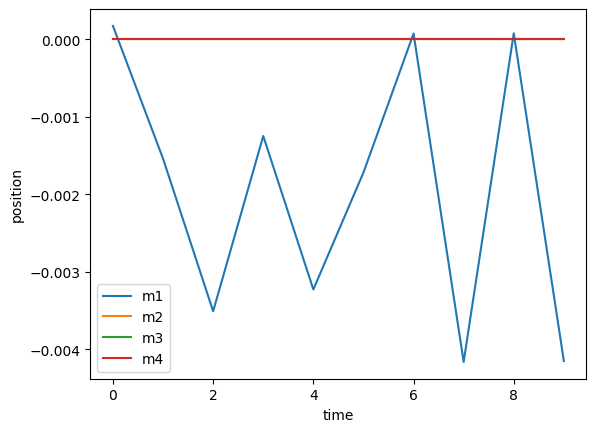

In [252]:
#plotting position
import matplotlib.pyplot as plt
plt.plot(full_pos_m1)
plt.plot(full_pos_m2)
plt.plot(full_pos_m3)
plt.plot(full_pos_m4)
plt.legend(["m1","m2","m3","m4"])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

In [255]:
full_vel_m1 = []
full_vel_m2 = []
full_vel_m3 = []
full_vel_m4 = []

for i in range(len(full_vel)):
  full_vel_m1.append(full_vel[i][0])
  full_vel_m2.append(full_vel[i][1])
  full_vel_m3.append(full_vel[i][2])
  full_vel_m4.append(full_vel[i][3])

In [256]:
print(full_vel_m1)
print(full_vel_m2)
print(full_vel_m3)
print(full_vel_m4)

[0.005462511305661608, -0.4294307439461074, 0.2601701183024435, -0.14270190060812474, -0.20069831232231525, -0.0242099948990832, 0.021212650015423273, 0.03192896944539731, 0.020993952928896418, 0.035738087011803414]
[0.5852458195122215, -0.07448884817106985, 0.42310862001826616, -0.17273875184770027, 0.1783358643322733, -0.6153554211828076, 0.0166909499407146, 0.23951090345045647, 0.01634734163595203, 0.23807242067368742]
[-0.00012156741066249172, 0.00040946424608045995, 0.003078686253923227, 0.0006865531067447217, 0.0020657622273697533, 0.001244695993738084, 0.02215267495726099, 0.0009203122862230973, 0.022202212416700996, 0.0008796579573886861]
[-0.014527980193835912, -0.0062490313942956165, -0.00265957227124281, 0.01435398859251201, -0.006606597406813346, 0.012435454032200356, 0.0022039126523869298, -0.015068791952768515, 0.002336863085429441, -0.01517644641463967]


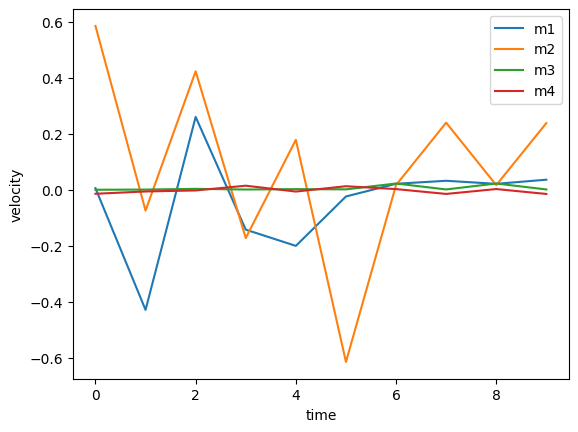

In [257]:
plt.plot(full_vel_m1)
plt.plot(full_vel_m2)
plt.plot(full_vel_m3)
plt.plot(full_vel_m4)
plt.legend(["m1","m2","m3","m4"])
plt.xlabel("time")
plt.ylabel("velocity")
plt.show()

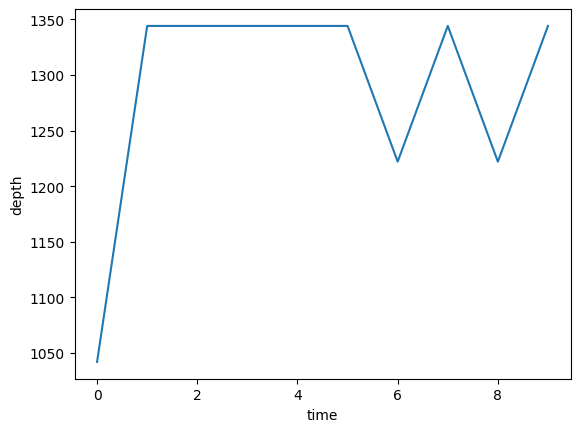

In [254]:
#depth
circuit_depth = [1042,1344,1344,1344,1344,1344,1222,1344,1222,1344]
plt.plot(circuit_depth)
plt.xlabel("time")
plt.ylabel("depth")
plt.show()

In [253]:
!zip -r /content/output.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2024.04.11/ (stored 0%)
  adding: content/.config/logs/2024.04.11/13.20.55.387089.log (deflated 58%)
  adding: content/.config/logs/2024.04.11/13.21.15.072579.log (deflated 58%)
  adding: content/.config/logs/2024.04.11/13.20.28.090352.log (deflated 91%)
  adding: content/.config/logs/2024.04.11/13.21.25.919190.log (deflated 57%)
  adding: content/.config/logs/2024.04.11/13.21.26.545746.log (deflated 56%)
  adding: content/.config/logs/2024.04.11/13.21.06.258241.log (deflated 86%)
  adding: co